In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ipywidgets import interactive
from keras.callbacks import TensorBoard

latent_dim = 2

# Methoden & Technieken

## Variational Auto-Encoders

12 Dec 2022

### Inhoud

- Voorbeeld: PCA op MNIST

- Voorbeeld: Auto Encoders op MNIST

- Variational Auto Encoders

- Voorbeeld: VAE op MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000,-1)).astype("float32") / 255
x_test = x_test.reshape((10000,-1)).astype("float32") / 255

x_train = 1 - x_train
x_test = 1 - x_test
pca = PCA(n_components=2).fit(x_train)
p = pca.transform(x_train)
xnew = pca.inverse_transform(p)

### Voorbeeld: PCA op MNIST

We voeren een PCA (2 componenten) uit op de MNIST data.

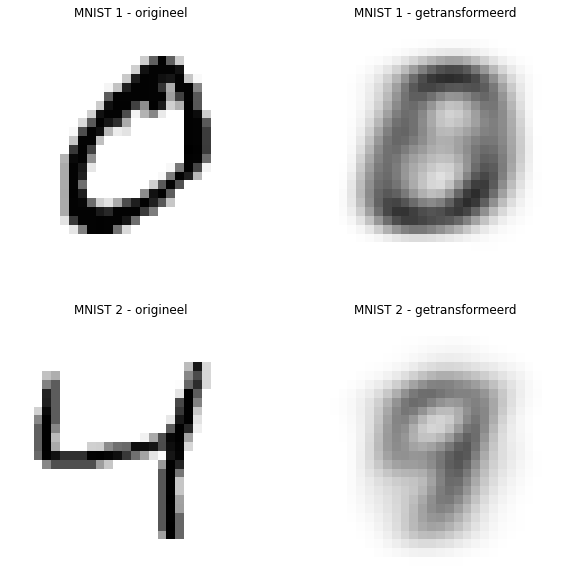

In [3]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - origineel')
plt.subplot(2,2,2)
plt.imshow(xnew[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getransformeerd')
plt.subplot(2,2,3)
plt.imshow(x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - origineel')
plt.subplot(2,2,4)
plt.imshow(xnew[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getransformeerd')
plt.show()

Als we de data projecteren op deze twee PC's zien we dat een PCA unsupervised redelijk de cijfers weet te onderscheiden.

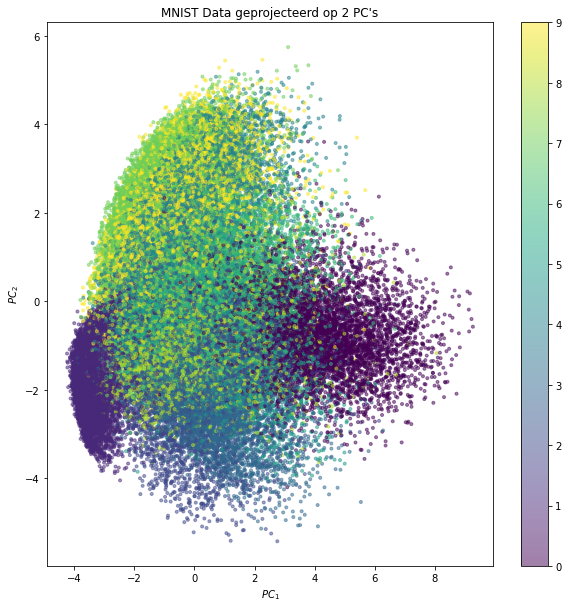

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(p[:,0], p[:,1], c = y_train, marker='.', alpha = 0.5)
plt.colorbar()
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$')
plt.title("MNIST Data geprojecteerd op 2 PC's")
plt.show()

In de getransformeerde ruimte kunnen we nu punten tussen de getransformeerde '0' en '4' kiezen en deze terug transformeren. Zo genereren we kunstmatige afbeeldingen die op beide plaatjes lijken.

$$
\vec{p}(t) = (1-t) \vec{p}_0 + t \vec{p}_4, \qquad \text{voor $t \in [0,1]$}.
$$

In [5]:
def interpolateplot(t):
    x = pca.inverse_transform((1-t)*p[1] + t*p[2])
    plt.figure(figsize=(5,5))
    plt.imshow(x.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    
interactive(interpolateplot, t=(0.0,1.0))
    

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0), Output()), _dom_classes=('widget-inter…

In [6]:
import keras
from keras import layers

input_img = keras.Input(shape=x_train[0].shape)
x = layers.Reshape((28,28,1))(input_img)
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
encoded = layers.Dense(2, activation='relu')(x)
# at this point the representation is 2-dimensional

x = layers.Dense(7 * 7 * 64, activation="relu")(encoded)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoded = layers.Flatten()(x)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

2022-12-12 10:46:54.212538: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Voorbeeld: Auto Encoders op MNIST

We kunnen nu hetzelfde proberen met een auto encoder.

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 2)                 34    

In [8]:
#autoencoder.fit(x_train, x_train,
#                epochs=50,
#                batch_size=128,
#                shuffle=True,
#                validation_data=(x_test, x_test),
#                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
#autoencoder.save('autoencoder')

In [9]:
autoencoder = keras.models.load_model('autoencoder')

xnew = autoencoder.predict(x_train)

De getransformeerde '0' en '4' lijken enigszins op wat we bij de PCA zagen.

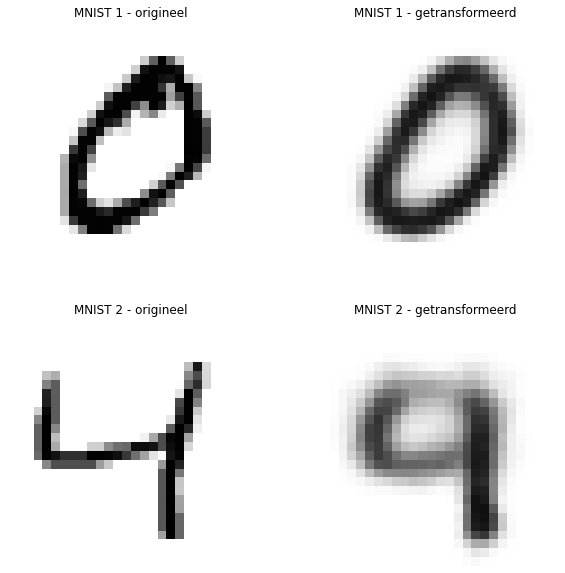

In [10]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - origineel')
plt.subplot(2,2,2)
plt.imshow(xnew[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getransformeerd')
plt.subplot(2,2,3)
plt.imshow(x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - origineel')
plt.subplot(2,2,4)
plt.imshow(xnew[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getransformeerd')
plt.show()

In [11]:
# Zie ook Listing 9.8 in DLP
encoder_model = keras.Model(autoencoder.input, autoencoder.layers[6].output)
decoder_model = keras.Model(autoencoder.layers[6].output, autoencoder.output)

latent = encoder_model.predict(x_train)
t = np.linspace(0,1,101).reshape(-1,1)
interpolated_latent = latent[1]*(1-t) + latent[2]*t

x_int = decoder_model.predict(interpolated_latent)

Bij de projectie op de latent space zien we dat sommige cijfers goed onderscheiden worden van de rest. 

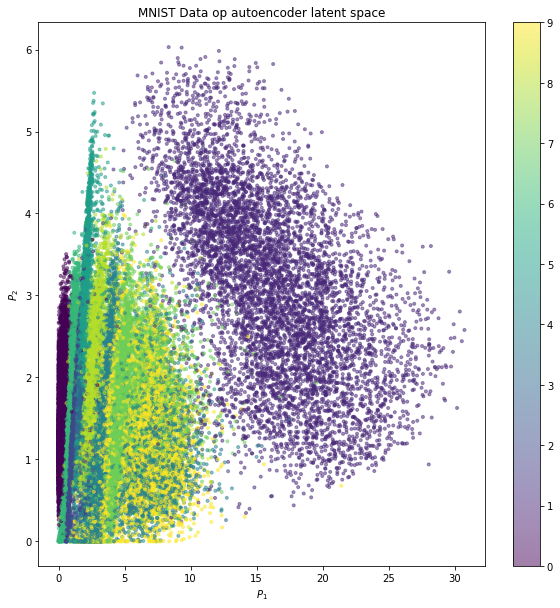

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(latent[:,0], latent[:,1], c = y_train, marker='.', alpha = 0.5)
plt.colorbar()
plt.xlabel('$P_1$')
plt.ylabel('$P_2$')
plt.title("MNIST Data op autoencoder latent space")
plt.show()

Maar als we nu tussen de '0' en '4' gaan interpoleren en nieuwe afbeeldingen gaan genereren, dan ziet het er opeens een stuk beter uit!

In [13]:
def interpolateplot2(t):
    plt.figure(figsize=(5,5))
    plt.imshow(x_int[t].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    
interactive(interpolateplot2, t=(0, 100))

interactive(children=(IntSlider(value=50, description='t'), Output()), _dom_classes=('widget-interact',))

### Variational Auto Encoders

- Waarnemingen worden gegenereerd via een kansproces
- De *latent* space beschrijft niet de exacte data maar de kansverdeling van dit proces
- We nemen aan dat deze kansverdeling een normaal verdeling is
- De *encoder* leert gemiddelde $(\mu)$ en variantie $(\sigma^2)$ van dee verdeling te schatten
- Vervolgens word er een trekking gedaan uit deze verdeling
- De *decoder* probeert deze trekking terug te transformeren naar de oorspronkelijke data

Omdat de decoder een variantie moet schatten is een aangepaste *loss* functie nodig:

$$
\text{loss} = \text{Reconstruction loss} + \text{$KL$-loss}
$$

De $KL$-loss is de *Kullback–Leibler divergence*, dit is een maat voor hoeveel twee kansverdelingen op elkaar lijken.

Schematisch:

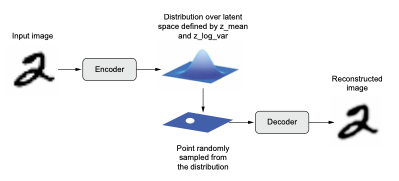

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

x_train = 1 - x_train

In [15]:

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### Voorbeeld: VAE op MNIST

In [16]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 14, 14, 32)   320         ['input_3[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d_3[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 3136)         0           ['conv2d_4[0][0]']               
                                                                                            

In [17]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 3136)              9408      
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         289 

In [18]:
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', run_eagerly=True)

In [19]:
#vae.fit(x_train, epochs=30, batch_size=128)
#
#vae.encoder.save('vae/encoder')
#vae.decoder.save('vae/decoder')

encoder = keras.models.load_model('vae/encoder')
decoder = keras.models.load_model('vae/decoder')
vae = VAE(encoder, decoder)

In [20]:
latent = encoder.predict(x_train)
xnew = decoder.predict(latent[0])

Resultaten lijken opnieuw op de PCA en de auto encoder.

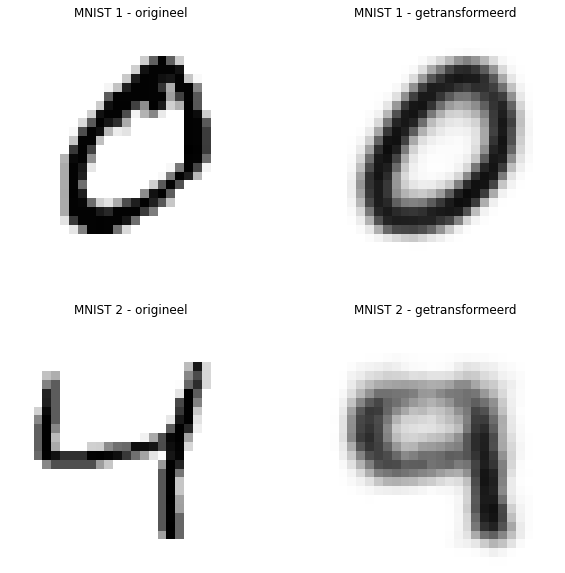

In [21]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - origineel')
plt.subplot(2,2,2)
plt.imshow(xnew[1,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getransformeerd')
plt.subplot(2,2,3)
plt.imshow(x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - origineel')
plt.subplot(2,2,4)
plt.imshow(xnew[2,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getransformeerd')
plt.show()

In [22]:
t = np.linspace(0,1,101).reshape(-1,1)
interpolated_latent = latent[0][1]*(1-t) + latent[0][2]*t

x_int = decoder.predict(interpolated_latent)

Resultaten zijn vergelijkbaar met de auto encoder (die werkte sowieso al redelijk) voor complexere problemen worden de VAE in het algemeen veel meer gebruikt.

In [23]:
def interpolateplot3(t):
    plt.figure(figsize=(5,5))
    plt.imshow(x_int[t].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    
interactive(interpolateplot3, t=(0, 100))

interactive(children=(IntSlider(value=50, description='t'), Output()), _dom_classes=('widget-interact',))

Als we kijken naar de latent space dan zien we dat het model een goede scheiding tussen de cijfers heeft gevonden.

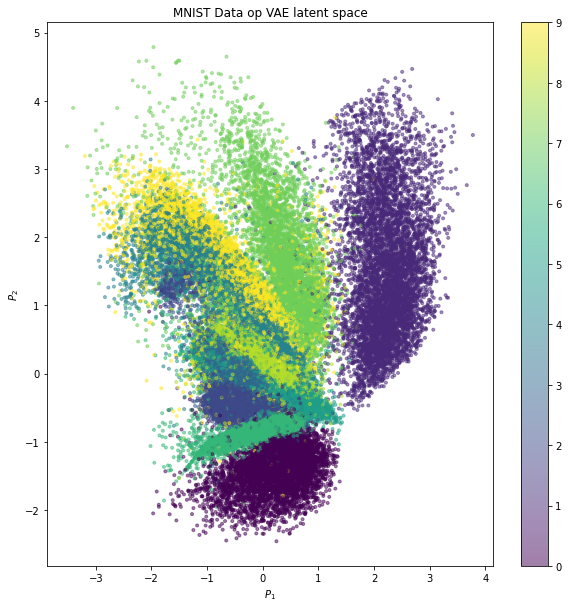

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(latent[0][:,0], latent[0][:,1], c = y_train, marker='.', alpha = 0.5)
plt.colorbar()
plt.xlabel('$P_1$')
plt.ylabel('$P_2$')
plt.title("MNIST Data op VAE latent space")
plt.show()